# Conexión con la base de datos

In [52]:
# Importa las bibliotecas necesarias
import pandas as pd
import psycopg2

In [53]:
# Crea una conexión con la base de datos
conn = psycopg2.connect(
    host="localhost", # reemplaza con tu servidor si no es local
    database="vianev_menores3_2017_2018",
    user="postgres", 
    password="p1234"
)

# DATA MART 1

In [54]:
query = 'select conglome, vivienda, id, altitud, sexo, departamento, provincia, distrito, res_peso, res_talla, res_hb, res_final from schema_nutri.general_001'

In [55]:
data_001 = pd.read_sql_query(query, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\3653845659.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_001 = pd.read_sql_query(query, conn)


In [56]:
data_001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conglome      713 non-null    int64 
 1   vivienda      713 non-null    int64 
 2   id            713 non-null    object
 3   altitud       713 non-null    int64 
 4   sexo          713 non-null    int64 
 5   departamento  713 non-null    object
 6   provincia     713 non-null    object
 7   distrito      713 non-null    object
 8   res_peso      713 non-null    int64 
 9   res_talla     713 non-null    int64 
 10  res_hb        713 non-null    int64 
 11  res_final     713 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 67.0+ KB


## Análisis exploratorio

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

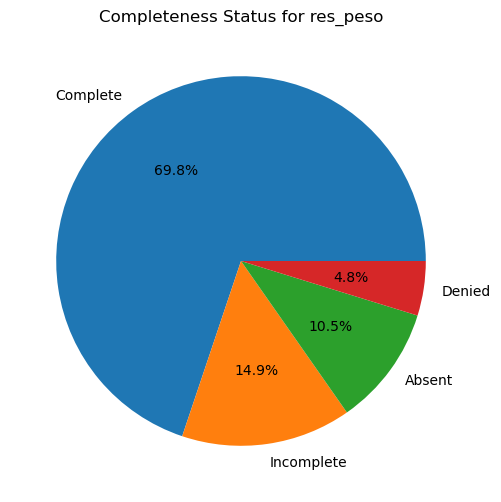

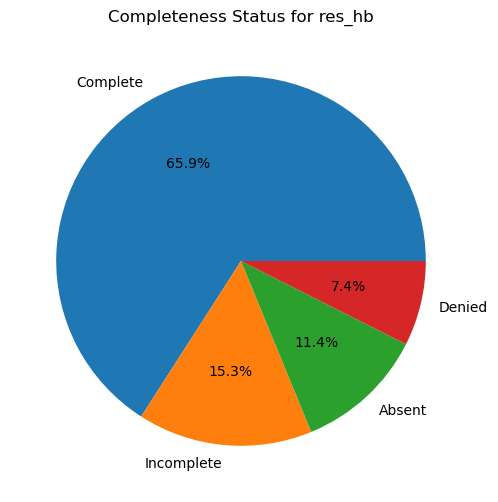

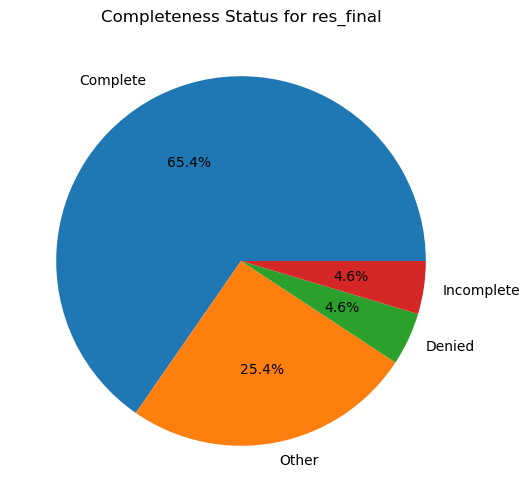

In [58]:

def create_pie_chart(column_name):

    status_counts = data_001[column_name].value_counts()
    

    status_labels = {
        1: 'Complete',
        2: 'Incomplete',
        3: 'Denied',
        4: 'Absent',
        5: 'Interview not started',
        6: 'Other'
    }
    

    present_labels = [status_labels[code] for code in status_counts.index]
    

    plt.figure(figsize=(10, 6))
    plt.pie(status_counts, labels=present_labels, autopct='%1.1f%%')
    plt.title(f'Completeness Status for {column_name}')
    plt.show()


create_pie_chart('res_peso')
create_pie_chart('res_hb')
create_pie_chart('res_final')


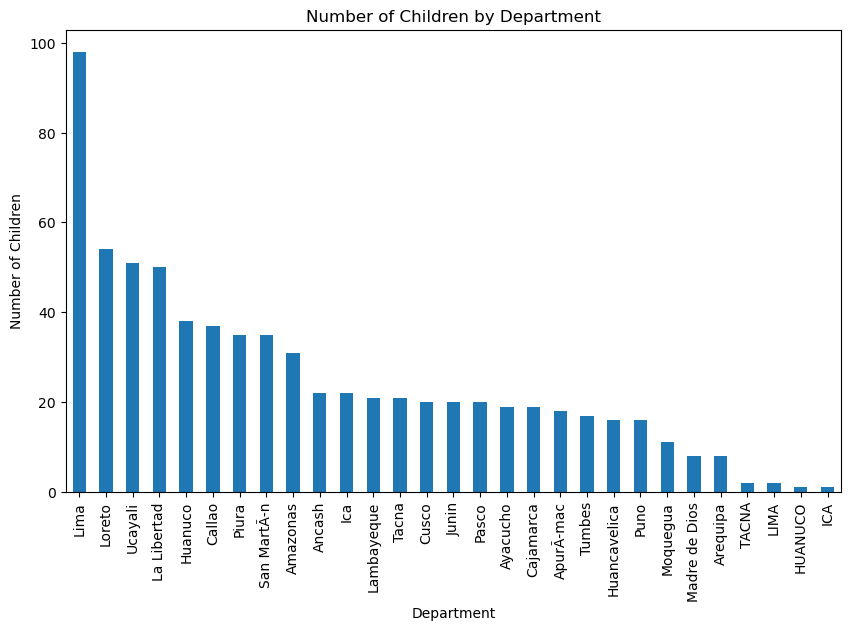

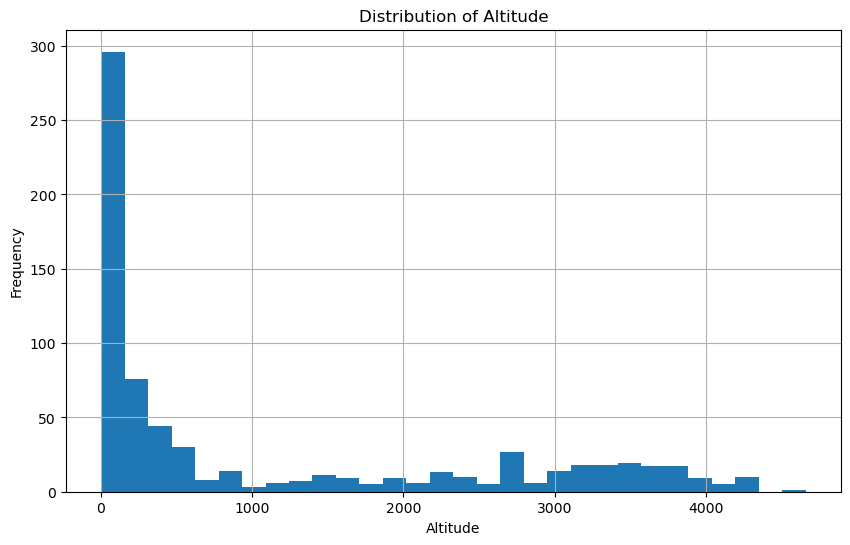

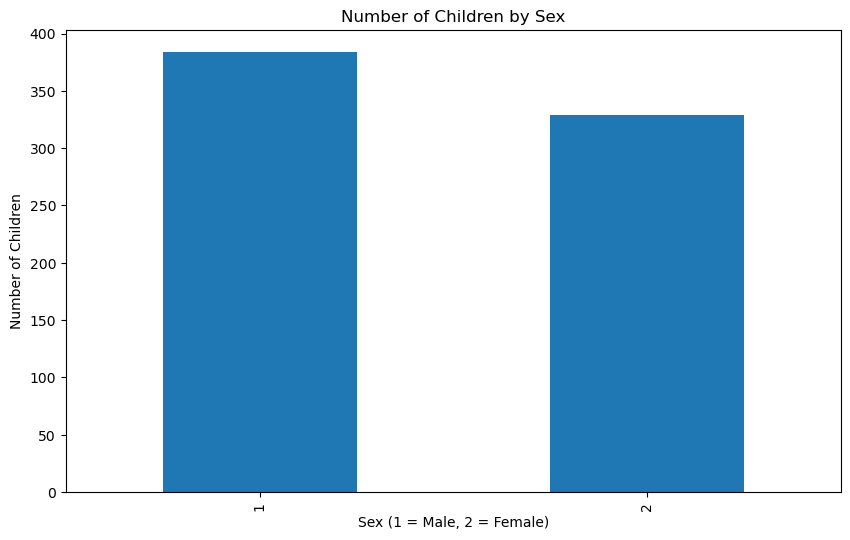

In [59]:

plt.figure(figsize=(10, 6))
data_001['departamento'].value_counts().plot(kind='bar')
plt.title('Number of Children by Department')
plt.xlabel('Department')
plt.ylabel('Number of Children')
plt.show()


plt.figure(figsize=(10, 6))
data_001['altitud'].hist(bins=30)
plt.title('Distribution of Altitude')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
data_001['sexo'].value_counts().plot(kind='bar')
plt.title('Number of Children by Sex')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Number of Children')
plt.show()


## Data: Factor

In [60]:
query2 = 'select conglome, vivienda, id, dominio, departamento, provincia, distrito  from schema_nutri.factor_zona'

In [61]:
data_factor = pd.read_sql_query(query2, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\223541683.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_factor = pd.read_sql_query(query2, conn)


In [62]:
data_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conglome      461 non-null    int64 
 1   vivienda      461 non-null    int64 
 2   id            461 non-null    object
 3   dominio       461 non-null    object
 4   departamento  461 non-null    object
 5   provincia     461 non-null    object
 6   distrito      461 non-null    object
dtypes: int64(2), object(5)
memory usage: 25.3+ KB


### 1. DATA INTEGRATION

In [63]:

merged_data = pd.merge(data_001, data_factor, on=['conglome', 'vivienda', 'id'])

# Check the first few rows of the merged dataframe
merged_data.head()


,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,dominio,departamento_y,provincia_y,distrito_y
0,5345,4,3.0,2581,2,ApurÃ­mac,ABANCAY,TAMBURCO,1,1,1,1,Resto urbano,APURÍMAC,ABANCAY,TAMBURCO
1,5351,1,6.0,2378,2,ApurÃ­mac,ABANCAY,ABANCAY,1,1,1,1,Resto urbano,APURÍMAC,ABANCAY,ABANCAY
2,5384,6,7.0,3075,1,ApurÃ­mac,CHINCHEROS,HUACCANA,1,1,1,1,Rural,APURÍMAC,CHINCHEROS,HUACCANA
3,6028,7,3.0,21,2,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA
4,6064,1,4.0,21,1,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA


In [64]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    object
 3   altitud         461 non-null    int64 
 4   sexo            461 non-null    int64 
 5   departamento_x  461 non-null    object
 6   provincia_x     461 non-null    object
 7   distrito_x      461 non-null    object
 8   res_peso        461 non-null    int64 
 9   res_talla       461 non-null    int64 
 10  res_hb          461 non-null    int64 
 11  res_final       461 non-null    int64 
 12  dominio         461 non-null    object
 13  departamento_y  461 non-null    object
 14  provincia_y     461 non-null    object
 15  distrito_y      461 non-null    object
dtypes: int64(8), object(8)
memory usage: 61.2+ KB


### DATA CLEANING 1 Y 2

In [65]:
merged_data.id.unique()

array(['3.0 ', '6.0 ', '7.0 ', '4.0 ', '5.0 ', '8.0 ', '9.0 ', '99.0',
       '2.0 ', '12.0', '11.0', '10.0', '14.0'], dtype=object)

In [66]:
columnas_a_eliminar = ['departamento_y', 'provincia_y', 'distrito_y']
merged_data= merged_data.drop(columnas_a_eliminar, axis=1)

In [67]:
merged_data['pais'] = 'Peru'

In [68]:
merged_data['id'] = merged_data['id'].astype(float)

In [69]:
merged_data['id'] = merged_data['id'].astype(int)

In [70]:
merged_data.id.unique()

array([ 3,  6,  7,  4,  5,  8,  9, 99,  2, 12, 11, 10, 14])

### DATA TRANSFORMATION

In [71]:
merged_data['index_'] = merged_data['conglome'].astype(str) + '_' + merged_data['vivienda'].astype(str) + '_' + merged_data['id'].astype(str)

In [72]:
# Define a function to classify each row as 'Urbano' or 'Rural'
def classify_area_type(row):
    if 'urbano' in row or 'Lima metropolitana' in row:
        return 'Urbano'
    else:
        return 'Rural'

# Apply the function to the 'DOMINIO' column
merged_data['Area_Type'] = merged_data['dominio'].apply(classify_area_type)


In [74]:



num_evaluated = merged_data['Area_Type'].value_counts()


num_urban = num_evaluated.loc[num_evaluated.index.str.contains('Urbano')].sum() 
num_rural = num_evaluated.loc[num_evaluated.index.str.contains('Rural')].sum()


num_total = num_evaluated.sum()


conglomerate_table = pd.DataFrame({
    'Urban': num_urban,
    'Rural': num_rural,
    'Total': num_total
}, index=['Number of Evaluated Children'])

conglomerate_table


,Urban,Rural,Total
Number of Evaluated Children,249,212,461


In [75]:
merged_data.departamento_x.value_counts()

Lima             61
Loreto           42
La Libertad      35
Ucayali          31
San MartÃ­n      29
Piura            24
Huanuco          23
Callao           23
Amazonas         21
Ica              18
Lambayeque       16
Cusco            14
Ayacucho         13
Ancash           13
Junin            12
Tacna            11
Huancavelica     11
ApurÃ­mac        11
Cajamarca        10
Pasco            10
Tumbes            8
Arequipa          7
Puno              7
Moquegua          5
Madre de Dios     4
HUANUCO           1
ICA               1
Name: departamento_x, dtype: int64

- Quitar el y.

In [76]:
merged_data.departamento_x = merged_data.departamento_x.str.capitalize()

In [77]:
merged_data.departamento_x.value_counts()

Lima             61
Loreto           42
La libertad      35
Ucayali          31
San martã­n      29
Huanuco          24
Piura            24
Callao           23
Amazonas         21
Ica              19
Lambayeque       16
Cusco            14
Ancash           13
Ayacucho         13
Junin            12
Apurã­mac        11
Huancavelica     11
Tacna            11
Cajamarca        10
Pasco            10
Tumbes            8
Arequipa          7
Puno              7
Moquegua          5
Madre de dios     4
Name: departamento_x, dtype: int64

In [78]:
merged_data.provincia_x.value_counts()

LIMA                      47
CALLAO                    25
MAYNAS                    22
TRUJILLO                  16
PADRE ABAD                13
                          ..
DANIEL ALCIDES CARRION     1
PAITA                      1
PUNO                       1
PICOTA                     1
CONTRALMIRANTE VILLAR      1
Name: provincia_x, Length: 111, dtype: int64

In [79]:
merged_data.distrito_x.value_counts()

VENTANILLA                14
SAN JUAN DE LURIGANCHO    10
CALLERIA                   8
COMAS                      7
RIO SANTIAGO               7
                          ..
FLORENCIA DE MORA          1
HUANCAYO                   1
EL CARMEN                  1
MARCONA                    1
PACHIZA                    1
Name: distrito_x, Length: 222, dtype: int64

<Figure size 1400x800 with 0 Axes>

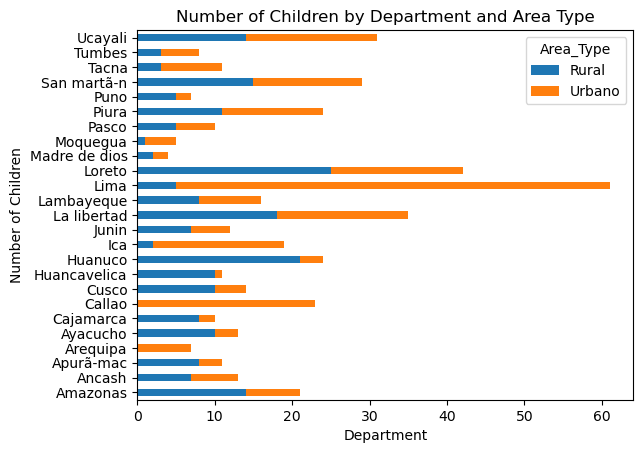

In [80]:
# Bar plot of the number of children by DEPARTAMENTO split by DOMINIO
plt.figure(figsize=(14, 8))
merged_data.groupby(['departamento_x', 'Area_Type']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Number of Children by Department and Area Type')
plt.xlabel('Department')
plt.ylabel('Number of Children')
plt.show()


### Observaciones

- La mezcla de merged data es 001 y factor

- No Habian nas

- 461 es el numero de filas de factor que se tuvo en comun con factor (hay data perdida sin factor de los datos generales)

- Los cambios fueron en uniformizacion de departamento (capitalize)

- Tambien se junto urbano con lima metropolitana en domia con 'Area Type'

- El csv pero esos graficos previos estan listos.

In [81]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    int32 
 3   altitud         461 non-null    int64 
 4   sexo            461 non-null    int64 
 5   departamento_x  461 non-null    object
 6   provincia_x     461 non-null    object
 7   distrito_x      461 non-null    object
 8   res_peso        461 non-null    int64 
 9   res_talla       461 non-null    int64 
 10  res_hb          461 non-null    int64 
 11  res_final       461 non-null    int64 
 12  dominio         461 non-null    object
 13  pais            461 non-null    object
 14  index_          461 non-null    object
 15  Area_Type       461 non-null    object
dtypes: int32(1), int64(8), object(7)
memory usage: 59.4+ KB


In [82]:
merged_data.sexo = merged_data.sexo.replace({1: 'Masculino', 2: 'Femenino'})

In [83]:
merged_data

,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,dominio,pais,index_,Area_Type
0,5345,4,3,2581,Femenino,Apurã­mac,ABANCAY,TAMBURCO,1,1,1,1,Resto urbano,Peru,5345_4_3,Urbano
1,5351,1,6,2378,Femenino,Apurã­mac,ABANCAY,ABANCAY,1,1,1,1,Resto urbano,Peru,5351_1_6,Urbano
2,5384,6,7,3075,Masculino,Apurã­mac,CHINCHEROS,HUACCANA,1,1,1,1,Rural,Peru,5384_6_7,Rural
3,6028,7,3,21,Femenino,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,Peru,6028_7_3,Urbano
4,6064,1,4,21,Masculino,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,Peru,6064_1_4,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,9719,109,99,450,Femenino,Ucayali,ATALAYA,RAYMONDI,1,1,1,1,Resto urbano,Peru,9719_109_99,Urbano
457,10122,114,11,41,Femenino,Ica,CHINCHA,CHINCHA ALTA,1,1,1,1,Resto urbano,Peru,10122_114_11,Urbano
458,10183,117,99,72,Femenino,La libertad,CHEPEN,PUEBLO NUEVO,1,1,1,1,Rural,Peru,10183_117_99,Rural
459,10262,161,99,12,Femenino,Lima,HUAURA,VEGUETA,1,1,1,1,Rural,Peru,10262_161_99,Rural


In [84]:
merged_data.provincia_x = merged_data.provincia_x.str.capitalize()

In [85]:
merged_data.distrito_x = merged_data.distrito_x.str.capitalize()

In [86]:
merged_data.head(2)

,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,dominio,pais,index_,Area_Type
0,5345,4,3,2581,Femenino,Apurã­mac,Abancay,Tamburco,1,1,1,1,Resto urbano,Peru,5345_4_3,Urbano
1,5351,1,6,2378,Femenino,Apurã­mac,Abancay,Abancay,1,1,1,1,Resto urbano,Peru,5351_1_6,Urbano


In [87]:
merged_data.departamento_x.unique()

array(['Apurã\xadmac', 'Callao', 'Cusco', 'Huanuco', 'Ica', 'Junin',
       'La libertad', 'Lambayeque', 'Lima', 'Madre de dios', 'Piura',
       'San martã\xadn', 'Tumbes', 'Ucayali', 'Amazonas', 'Ancash',
       'Arequipa', 'Ayacucho', 'Cajamarca', 'Huancavelica', 'Loreto',
       'Moquegua', 'Pasco', 'Puno', 'Tacna'], dtype=object)

In [88]:
merged_data.departamento_x = merged_data.departamento_x.replace({'Apurã\xadmac': 'Apurimac', 'San martã\xadn': 'San Martin'})

In [89]:
merged_data.provincia_x.unique()

array(['Abancay', 'Chincheros', 'Callao', 'Calca', 'Puerto inca', 'Ica',
       'Huancayo', 'Satipo', 'Trujillo', 'Chiclayo', 'Lima', 'Tambopata',
       'Piura', 'Lamas', 'Rioja', 'Picota', 'Zarumilla', 'Atalaya',
       'Coronel portillo', 'Chanchamayo', 'Chachapoyas', 'Condorcanqui',
       'Bagua', 'Luya', 'Utcubamba', 'Santa', 'Casma', 'Huaraz', 'Sihuas',
       'Yungay', 'Andahuaylas', 'Arequipa', 'Huamanga',
       'Paucar del sara sara', 'Huanta', 'Cajamarca', 'Hualgayoc', 'Jaen',
       'Chota', 'San miguel', 'Chumbivilcas', 'Canchis', 'Anta',
       'Quispicanchi', 'Espinar', 'Huancavelica', 'Tayacaja', 'Churcampa',
       'Acobamba', 'Angaraes', 'Huanuco', 'Leoncio prado', 'Maraã‘on',
       'Dos de mayo', 'Pachitea', 'Chincha', 'Pisco', 'Nazca', 'Jauja',
       'Pacasmayo', 'Otuzco', 'Santiago de chuco', 'Lambayeque',
       'Barranca', 'Huaura', 'Caã‘ete', 'Huaral', 'Maynas',
       'Alto amazonas', 'Ucayali', 'Loreto', 'Mariscal ramon castilla',
       'Tahuamanu', 'Maris

In [90]:
merged_data.provincia_x = merged_data.provincia_x.replace({'Datem del maraã‘on': 'Datem del maranon', 'Caã‘ete': 'Canete', 'Maraã‘on':'Maranon'})

In [91]:
merged_data.distrito_x.unique()

array(['Tamburco', 'Abancay', 'Huaccana', 'Ventanilla', 'Lares',
       'Tournavista', 'Ica', 'Salas', 'Sicaya', 'Coviriali', 'Trujillo',
       'Jose leonardo ortiz', 'Independencia', 'San juan de lurigancho',
       'Tambopata', 'La union', 'Lamas', 'Pardo miguel', 'Picota',
       'Matapalo', 'Raymondi', 'Iparia', 'Pichanaqui', 'Chachapoyas',
       'Nieva', 'Bagua', 'Camporredondo', 'Rio santiago', 'Cajaruro',
       'Ocalli', 'Ocumal', 'La jalca', 'Chimbote', 'Yautan', 'Huaraz',
       'San juan', 'Quillo', 'Pampachiri', 'Cerro colorado', 'Arequipa',
       'Paucarpata', 'Socabaya', 'Uchumayo', 'Jesus nazareno', 'Pausa',
       'Sivia', 'Los baã‘os del inca', 'Bambamarca', 'Bellavista',
       'Chimban', 'La florida', 'Mi peru', 'Callao', 'Santo tomas',
       'Pitumarca', 'Andaraes', 'Ancahuasi', 'Quiquijana', 'Pallpata',
       'Huancavelica', 'Tintay puncu', 'San pedro de coris', 'Rosario',
       'Nuevo occoro', 'Congalla', 'Huanuco', 'Rupa - rupa', 'Cholon',
       'Hermilio 

In [92]:
merged_data.distito_x = merged_data.distrito_x.replace({'Breã‘a': 'Brena', 'Los baã‘os del inca': 'Los banos del inca', 'Ichuã‘a':'Ichuna'})

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\154199942.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  merged_data.distito_x = merged_data.distrito_x.replace({'Breã‘a': 'Brena', 'Los baã‘os del inca': 'Los banos del inca', 'Ichuã‘a':'Ichuna'})


In [93]:
merged_data = merged_data.reset_index()

In [94]:
merged_data.drop(columns='dominio', axis=1, inplace=True)

In [95]:
merged_data

,index,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,pais,index_,Area_Type
0,0,5345,4,3,2581,Femenino,Apurimac,Abancay,Tamburco,1,1,1,1,Peru,5345_4_3,Urbano
1,1,5351,1,6,2378,Femenino,Apurimac,Abancay,Abancay,1,1,1,1,Peru,5351_1_6,Urbano
2,2,5384,6,7,3075,Masculino,Apurimac,Chincheros,Huaccana,1,1,1,1,Peru,5384_6_7,Rural
3,3,6028,7,3,21,Femenino,Callao,Callao,Ventanilla,1,1,1,1,Peru,6028_7_3,Urbano
4,4,6064,1,4,21,Masculino,Callao,Callao,Ventanilla,1,1,1,1,Peru,6064_1_4,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,456,9719,109,99,450,Femenino,Ucayali,Atalaya,Raymondi,1,1,1,1,Peru,9719_109_99,Urbano
457,457,10122,114,11,41,Femenino,Ica,Chincha,Chincha alta,1,1,1,1,Peru,10122_114_11,Urbano
458,458,10183,117,99,72,Femenino,La libertad,Chepen,Pueblo nuevo,1,1,1,1,Peru,10183_117_99,Rural
459,459,10262,161,99,12,Femenino,Lima,Huaura,Vegueta,1,1,1,1,Peru,10262_161_99,Rural


In [96]:
needed_columns = ['conglome', 'vivienda','id','index_', 'altitud', 'sexo', 'departamento_x', 'provincia_x', 'distrito_x', 'res_peso',	'res_talla','res_hb',	'res_final',	'pais',	'Area_Type'] 

In [97]:
clean_merged_gen_fact = merged_data[needed_columns]
clean_merged_gen_fact

,conglome,vivienda,id,index_,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,pais,Area_Type
0,5345,4,3,5345_4_3,2581,Femenino,Apurimac,Abancay,Tamburco,1,1,1,1,Peru,Urbano
1,5351,1,6,5351_1_6,2378,Femenino,Apurimac,Abancay,Abancay,1,1,1,1,Peru,Urbano
2,5384,6,7,5384_6_7,3075,Masculino,Apurimac,Chincheros,Huaccana,1,1,1,1,Peru,Rural
3,6028,7,3,6028_7_3,21,Femenino,Callao,Callao,Ventanilla,1,1,1,1,Peru,Urbano
4,6064,1,4,6064_1_4,21,Masculino,Callao,Callao,Ventanilla,1,1,1,1,Peru,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,9719,109,99,9719_109_99,450,Femenino,Ucayali,Atalaya,Raymondi,1,1,1,1,Peru,Urbano
457,10122,114,11,10122_114_11,41,Femenino,Ica,Chincha,Chincha alta,1,1,1,1,Peru,Urbano
458,10183,117,99,10183_117_99,72,Femenino,La libertad,Chepen,Pueblo nuevo,1,1,1,1,Peru,Rural
459,10262,161,99,10262_161_99,12,Femenino,Lima,Huaura,Vegueta,1,1,1,1,Peru,Rural


In [98]:
clean_merged_gen_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    int32 
 3   index_          461 non-null    object
 4   altitud         461 non-null    int64 
 5   sexo            461 non-null    object
 6   departamento_x  461 non-null    object
 7   provincia_x     461 non-null    object
 8   distrito_x      461 non-null    object
 9   res_peso        461 non-null    int64 
 10  res_talla       461 non-null    int64 
 11  res_hb          461 non-null    int64 
 12  res_final       461 non-null    int64 
 13  pais            461 non-null    object
 14  Area_Type       461 non-null    object
dtypes: int32(1), int64(7), object(7)
memory usage: 52.3+ KB


In [99]:
clean_merged_gen_fact.id.unique()

array([ 3,  6,  7,  4,  5,  8,  9, 99,  2, 12, 11, 10, 14])

In [100]:
clean_merged_gen_fact.to_csv('clean_data/clean_data_mergerd_gen_factor.csv', index=False)

# DATA MART 2: SEGURO_PS & ANEMIA

In [101]:
query_seguro = 'select conglome, vivienda, id, p209 from schema_nutri.seguro_ps'

In [102]:
data_seguro = pd.read_sql_query(query_seguro, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\1441958404.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_seguro = pd.read_sql_query(query_seguro, conn)


## Data cleaning level 1

In [103]:
data_seguro['index_'] = data_seguro['conglome'].astype(str) + '_' + data_seguro['vivienda'].astype(str) + '_' + data_seguro['id'].astype(float).astype(int).astype(str)


In [104]:
data_seguro

,conglome,vivienda,id,p209,index_
0,8330,106,7.0,NaN,8330_106_7
1,8793,47,5.0,6.0,8793_47_5
2,9650,55,99.0,3.0,9650_55_99
3,8729,65,4.0,3.0,8729_65_4
4,8729,67,6.0,3.0,8729_67_6
...,...,...,...,...,...
309,6981,9,6.0,3.0,6981_9_6
310,7145,61,2.0,1.0,7145_61_2
311,7145,97,5.0,6.0,7145_97_5
312,7145,115,3.0,6.0,7145_115_3


In [105]:
merged_seguro_anemia = pd.merge(data_seguro, data_anemia, on=['index_'])

In [106]:
merged_seguro_anemia

,conglome_x,vivienda_x,id_x,p209,index_,conglome_y,vivienda_y,id_y,p307
0,8330,106,7.0,NaN,8330_106_7,8330,106,7.0,2
1,8793,47,5.0,6.0,8793_47_5,8793,47,5.0,1
2,9650,55,99.0,3.0,9650_55_99,9650,55,99.0,2
3,8729,65,4.0,3.0,8729_65_4,8729,65,4.0,2
4,8729,67,6.0,3.0,8729_67_6,8729,67,6.0,1
...,...,...,...,...,...,...,...,...,...
308,6981,9,6.0,3.0,6981_9_6,6981,9,6.0,1
309,7145,61,2.0,1.0,7145_61_2,7145,61,2.0,2
310,7145,97,5.0,6.0,7145_97_5,7145,97,5.0,2
311,7145,115,3.0,6.0,7145_115_3,7145,115,3.0,2


In [107]:
merged_seguro_anemia.rename(columns={'p307':'Anemia'},inplace=True)

In [108]:
merged_seguro_anemia.rename(columns={'p209':'Seguro'},inplace=True)

## Data cleaning level 2

In [109]:
merged_seguro_anemia.drop(columns={'id_y','conglome_y','vivienda_y'}, axis =1,inplace=True)

In [110]:
merged_seguro_anemia.iloc[:,5]=merged_seguro_anemia.iloc[:,5].replace([1,2,3],['Si','No','NS'])

In [111]:
merged_seguro_anemia.iloc[:,3]=merged_seguro_anemia.iloc[:,3].replace([1,2,3,4,5,6,7],['EsSalud','FFAA','SIS','EPS','Seguro_Privado','Sin_Seguro','NS/NR'])

In [112]:
merged_seguro_anemia

,conglome_x,vivienda_x,id_x,Seguro,index_,Anemia
0,8330,106,7.0,NaN,8330_106_7,No
1,8793,47,5.0,Sin_Seguro,8793_47_5,Si
2,9650,55,99.0,SIS,9650_55_99,No
3,8729,65,4.0,SIS,8729_65_4,No
4,8729,67,6.0,SIS,8729_67_6,Si
...,...,...,...,...,...,...
308,6981,9,6.0,SIS,6981_9_6,Si
309,7145,61,2.0,EsSalud,7145_61_2,No
310,7145,97,5.0,Sin_Seguro,7145_97_5,No
311,7145,115,3.0,Sin_Seguro,7145_115_3,No


## Data cleaning level 3

In [113]:
merged_seguro_anemia.info()
# Al existir pocos nulos se excluyen totalmente de la columna 
# p209, no se toman en cuenta

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 312
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   conglome_x  313 non-null    int64 
 1   vivienda_x  313 non-null    int64 
 2   id_x        313 non-null    object
 3   Seguro      289 non-null    object
 4   index_      313 non-null    object
 5   Anemia      313 non-null    object
dtypes: int64(2), object(4)
memory usage: 17.1+ KB


In [114]:
merged_seguro_anemia.to_csv('clean_data/clean_merged_seguro_anemia.csv', index=False)

# DATA MART 3: NECESIDADES_100 & BMI


In [115]:
query_necesidad = 'select * from schema_nutri.necesidades_100'

In [116]:
data_necesidad = pd.read_sql_query(query_necesidad, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\2693263261.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_necesidad = pd.read_sql_query(query_necesidad, conn)


In [117]:
#data_necesidad.iloc[:,5:]

## Data cleaning level 1

In [118]:
data_necesidad['index_'] = data_necesidad['conglome'].astype(str) + '_' + data_necesidad['vivienda'].astype(str) + '_' + data_necesidad['id'].astype(float).astype(int).astype(str)


In [119]:
#data_necesidad.columns

In [120]:
data_necesidad.p113_bicicleta.unique()

array([2, 1], dtype=int64)

## Data cleaning level 2

In [121]:
needed_columns = ['conglome','vivienda','id','index_','p113_bicicleta','p113_motocicleta','p113_carro','p113_otro','p111_tel_fijo','p111_tel_celular','p111_cable','p111_internet','p112_radio','p112_televisor','p112_computadora','p112_horno','p112_lavadora','p112_refrigeradora','p112_cocina','p112_plancha','p112_equipo'] 

In [122]:
clean_data_necesidad = data_necesidad[needed_columns]
clean_data_necesidad

,conglome,vivienda,id,index_,p113_bicicleta,p113_motocicleta,p113_carro,p113_otro,p111_tel_fijo,p111_tel_celular,...,p111_internet,p112_radio,p112_televisor,p112_computadora,p112_horno,p112_lavadora,p112_refrigeradora,p112_cocina,p112_plancha,p112_equipo
0,5345,4,3.0,5345_4_3,2,2,1,2,2,1,...,2,2,1,2,2,2,2,1,2,2
1,5384,6,7.0,5384_6_7,2,1,2,1,2,1,...,2,1,1,2,2,2,2,2,2,1
2,6064,1,4.0,6064_1_4,2,2,2,2,2,1,...,2,2,1,2,2,1,2,1,2,2
3,6287,3,3.0,6287_3_3,2,2,2,2,2,1,...,2,1,1,2,2,2,2,2,2,2
4,6643,6,5.0,6643_6_5,2,2,2,1,2,1,...,2,1,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,7541,123,99.0,7541_123_99,2,2,2,2,2,1,...,2,1,1,1,2,1,1,1,1,2
310,9040,138,99.0,9040_138_99,2,1,2,2,2,1,...,2,2,2,2,2,2,2,1,2,2
311,9719,109,99.0,9719_109_99,2,2,2,1,2,1,...,2,1,1,2,2,2,1,1,1,2
312,10122,114,11.0,10122_114_11,2,2,2,2,2,1,...,2,2,1,2,2,2,2,1,1,2


In [123]:
clean_data_necesidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   conglome            314 non-null    int64 
 1   vivienda            314 non-null    int64 
 2   id                  314 non-null    object
 3   index_              314 non-null    object
 4   p113_bicicleta      314 non-null    int64 
 5   p113_motocicleta    314 non-null    int64 
 6   p113_carro          314 non-null    int64 
 7   p113_otro           314 non-null    int64 
 8   p111_tel_fijo       314 non-null    int64 
 9   p111_tel_celular    314 non-null    int64 
 10  p111_cable          314 non-null    int64 
 11  p111_internet       314 non-null    int64 
 12  p112_radio          314 non-null    int64 
 13  p112_televisor      314 non-null    int64 
 14  p112_computadora    314 non-null    int64 
 15  p112_horno          314 non-null    int64 
 16  p112_lavadora       314 no

In [124]:
#lista = ['p113_bicicleta','p113_motocicleta','p113_carro','p113_otro','p111_tel_fijo','p111_tel_celular','p111_cable','p111_internet','p112_radio','p112_televisor','p112_computadora','p112_horno','p112_lavadora','p112_refrigeradora','p112_cocina','p112_plancha','p112_equipo']
#len(lista)

In [125]:
#clean_data_necesidad.iloc[:,4:]

In [126]:
#clean_data_necesidad

In [127]:
clean_data_necesidad.iloc[:,4:] = clean_data_necesidad.iloc[:,4:].replace([1,2,3],['Si','No','NS'])

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\2255119023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_necesidad.iloc[:,4:] = clean_data_necesidad.iloc[:,4:].replace([1,2,3],['Si','No','NS'])


In [128]:
clean_data_necesidad.iloc[:,4:]=clean_data_necesidad.iloc[:,4:].replace(['Si','No','NS'],[1,0,0])

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\163924108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_necesidad.iloc[:,4:]=clean_data_necesidad.iloc[:,4:].replace(['Si','No','NS'],[1,0,0])
C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\163924108.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clean_data_necesidad.iloc[:,4:]=clean_data_necesidad.iloc[:,4:].replace(['Si','No','NS'],[1,0,0])


In [129]:
clean_data_necesidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   conglome            314 non-null    int64 
 1   vivienda            314 non-null    int64 
 2   id                  314 non-null    object
 3   index_              314 non-null    object
 4   p113_bicicleta      314 non-null    int64 
 5   p113_motocicleta    314 non-null    int64 
 6   p113_carro          314 non-null    int64 
 7   p113_otro           314 non-null    int64 
 8   p111_tel_fijo       314 non-null    int64 
 9   p111_tel_celular    314 non-null    int64 
 10  p111_cable          314 non-null    int64 
 11  p111_internet       314 non-null    int64 
 12  p112_radio          314 non-null    int64 
 13  p112_televisor      314 non-null    int64 
 14  p112_computadora    314 non-null    int64 
 15  p112_horno          314 non-null    int64 
 16  p112_lavadora       314 no

## Data cleaning level 1 & 2 (Transformation & Replace)

In [130]:
clean_data_necesidad['CumpleNecesidad'] = -1

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\3140992228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_necesidad['CumpleNecesidad'] = -1


In [131]:
clean_data_necesidad['CumpleNecesidad'] = 0
for i in range(len(clean_data_necesidad)):
    value = sum(clean_data_necesidad.iloc[i,4:])
    if(value >= 9):
        clean_data_necesidad.iloc[i,-1] = 1
    else:
        clean_data_necesidad.iloc[i,-1] = 0

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\3527456365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_necesidad['CumpleNecesidad'] = 0


In [132]:
clean_data_necesidad.iloc[:,4:]=clean_data_necesidad.iloc[:,4:].replace([1,0],['Si','No'])

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\4050484121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_necesidad.iloc[:,4:]=clean_data_necesidad.iloc[:,4:].replace([1,0],['Si','No'])


In [133]:
#clean_data_necesidad.head(20)

In [134]:
#clean_data_necesidad.drop(columns='CumpleNecesidad',axis=1,inplace=True)

In [135]:
clean_data_necesidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   conglome            314 non-null    int64 
 1   vivienda            314 non-null    int64 
 2   id                  314 non-null    object
 3   index_              314 non-null    object
 4   p113_bicicleta      314 non-null    object
 5   p113_motocicleta    314 non-null    object
 6   p113_carro          314 non-null    object
 7   p113_otro           314 non-null    object
 8   p111_tel_fijo       314 non-null    object
 9   p111_tel_celular    314 non-null    object
 10  p111_cable          314 non-null    object
 11  p111_internet       314 non-null    object
 12  p112_radio          314 non-null    object
 13  p112_televisor      314 non-null    object
 14  p112_computadora    314 non-null    object
 15  p112_horno          314 non-null    object
 16  p112_lavadora       314 no

In [136]:
clean_data_necesidad.index_

0          5345_4_3
1          5384_6_7
2          6064_1_4
3          6287_3_3
4          6643_6_5
           ...     
309     7541_123_99
310     9040_138_99
311     9719_109_99
312    10122_114_11
313    10183_117_99
Name: index_, Length: 314, dtype: object

In [137]:
clean_data_necesidad.id.unique()

array(['3.0 ', '7.0 ', '4.0 ', '5.0 ', '6.0 ', '99.0', '8.0 ', '9.0 ',
       '2.0 ', '10.0', '99.1', '99.2', '11.0'], dtype=object)

In [138]:
clean_data_necesidad['id'] = clean_data_necesidad['id'].astype(float)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\3106415732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_necesidad['id'] = clean_data_necesidad['id'].astype(float)


In [139]:
clean_data_necesidad['id'] = clean_data_necesidad['id'].astype(int)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\1506666106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_necesidad['id'] = clean_data_necesidad['id'].astype(int)


In [140]:
#merged_data_necesidad = pd.merge(merged_data, clean_data_necesidad, on=['index_'])
#merged_data_necesidad

In [141]:
clean_data_necesidad.index_.value_counts()

8671_36_99      2
10380_11_7      1
5286_103_5      1
5241_106_4      1
5074_80_99      1
               ..
7279_76_99      1
7248_88_5       1
7248_88_99      1
7248_87_7       1
10183_117_99    1
Name: index_, Length: 313, dtype: int64

In [142]:
clean_data_necesidad = clean_data_necesidad.loc[~clean_data_necesidad.index_.duplicated(keep='first')]

In [143]:
clean_data_necesidad.index_.value_counts()

5345_4_3        1
10380_55_5      1
5435_208_4      1
5286_103_5      1
5241_106_4      1
               ..
7279_76_99      1
7248_88_5       1
7248_88_99      1
7248_87_7       1
10183_117_99    1
Name: index_, Length: 313, dtype: int64

In [144]:
bmi = pd.read_csv('bmi.csv')

In [145]:
merged_data_necesidad_final = pd.merge(clean_data_necesidad, bmi, on=['index_'])
merged_data_necesidad_final

,conglome,vivienda,id,index_,p113_bicicleta,p113_motocicleta,p113_carro,p113_otro,p111_tel_fijo,p111_tel_celular,...,p112_lavadora,p112_refrigeradora,p112_cocina,p112_plancha,p112_equipo,CumpleNecesidad,Amamantado,sexo,Control,BMI
0,5345,4,3,5345_4_3,No,No,Si,No,No,Si,...,No,No,Si,No,No,No,Si,Femenino,0,13.166069
1,5345,4,3,5345_4_3,No,No,Si,No,No,Si,...,No,No,Si,No,No,No,Si,Femenino,1,15.518782
2,5345,4,3,5345_4_3,No,No,Si,No,No,Si,...,No,No,Si,No,No,No,Si,Femenino,2,22.633745
3,5345,4,3,5345_4_3,No,No,Si,No,No,Si,...,No,No,Si,No,No,No,Si,Femenino,3,19.322235
4,5345,4,3,5345_4_3,No,No,Si,No,No,Si,...,No,No,Si,No,No,No,Si,Femenino,4,19.098346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,10183,117,99,10183_117_99,No,No,No,No,No,Si,...,No,No,Si,Si,No,No,Si,Femenino,3,16.888104
2356,10183,117,99,10183_117_99,No,No,No,No,No,Si,...,No,No,Si,Si,No,No,Si,Femenino,4,18.549229
2357,10183,117,99,10183_117_99,No,No,No,No,No,Si,...,No,No,Si,Si,No,No,Si,Femenino,5,18.568968
2358,10183,117,99,10183_117_99,No,No,No,No,No,Si,...,No,No,Si,Si,No,No,Si,Femenino,6,19.528120


## Data cleaning level 1

In [146]:
def conditionBMI(value):
    if value<18:
        return "Bajo Peso"
    elif value >= 18.5 and value <= 24.9:
        return "Normal"
    elif value >= 25 and value <= 26.9:
        return "Sobrepeso"
    elif value >= 27 and value <= 29.9:
        return "Obesidad"
    elif value >= 30 and value <= 34.9:
        return "Obesidad I"
    elif value >= 35 and value <= 39.9:
        return "Obesidad II"
    else:
        return "Obesidad III"
    

In [147]:
merged_data_necesidad_final['Estado_nutricional']= merged_data_necesidad_final.BMI.apply(lambda v: conditionBMI(v))


In [148]:
#merged_data_necesidad_final[['BMI','Estado_nutricional']]

In [149]:
merged_data_necesidad_final.drop(columns={'id'}, axis=1, inplace=True)

In [150]:
merged_data_necesidad_final.index_.value_counts()

5345_4_3        8
9827_29_5       8
5074_80_99      8
5074_160_6      8
5074_160_99     8
               ..
7279_76_99      8
7248_88_5       8
7248_88_99      8
7248_87_7       8
10183_117_99    8
Name: index_, Length: 295, dtype: int64

In [151]:
merged_data_necesidad_final = merged_data_necesidad_final.loc[~merged_data_necesidad_final.index_.duplicated(keep='first')]

In [152]:
merged_data_necesidad_final.to_csv('clean_data/clean_merged_data_necesidad_final.csv', index=False)

# DATA MART 4: ANEMIA Y SUPLEMENTOS


In [153]:
query3 = 'select conglome, vivienda, id, P314_CONSUME_SUPL  from schema_nutri.suplementos_300'

In [154]:
data_suplementos = pd.read_sql_query(query3, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\2668608282.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_suplementos = pd.read_sql_query(query3, conn)


In [155]:
data_suplementos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   conglome           274 non-null    int64 
 1   vivienda           274 non-null    int64 
 2   id                 274 non-null    object
 3   p314_consume_supl  274 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.7+ KB


In [156]:
query4 = 'select conglome, vivienda, id, P307 from schema_nutri.anemia_300'

In [157]:
data_anemia = pd.read_sql_query(query4, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\584411509.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_anemia = pd.read_sql_query(query4, conn)


## Data cleaning level 1 (index_ column)

In [158]:
data_anemia['index_'] = data_anemia['conglome'].astype(str) + '_' + data_anemia['vivienda'].astype(str) + '_' + data_anemia['id'].astype(float).astype(int).astype(str)


In [159]:
data_anemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   conglome  495 non-null    int64 
 1   vivienda  495 non-null    int64 
 2   id        495 non-null    object
 3   p307      495 non-null    int64 
 4   index_    495 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.5+ KB


## Data integration

In [160]:
# Merge the supplement and anemia dataframes on CONGLOME, VIVIENDA, and ID
merged_supplements_anemia = pd.merge(data_suplementos, data_anemia, on=['conglome', 'vivienda', 'id'])

# Display the first few rows of the merged dataframe
merged_supplements_anemia.head()

,conglome,vivienda,id,p314_consume_supl,p307,index_
0,8330,15,3.0,2,1,8330_15_3
1,8793,47,5.0,2,1,8793_47_5
2,6581,82,99.0,2,2,6581_82_99
3,8729,67,6.0,2,1,8729_67_6
4,6266,86,4.0,2,1,6266_86_4


## Data cleaning level 1

In [161]:
merged_supplements_anemia["index_"] = merged_supplements_anemia["conglome"].astype(str) + '_' + merged_supplements_anemia["vivienda"].astype(str) + '_' + merged_supplements_anemia["id"].astype(float).astype(int).astype(str)

In [162]:
merged_supplements_anemia = merged_supplements_anemia.rename(columns={'p314_consume_supl': 'suplementos', 'p307': 'anemia'})

## Data cleaning level 2

In [163]:
merged_supplements_anemia = merged_supplements_anemia.drop(['conglome', 'vivienda', 'id'], axis=1)

In [164]:
merged_supplements_anemia.suplementos.replace({1: 'Si', 2: 'No'}, inplace=True)

In [165]:
merged_supplements_anemia.anemia.replace({1: 'Si', 2: 'No'}, inplace=True)

## Data cleaning level 3

In [166]:
merged_supplements_anemia = merged_supplements_anemia.drop(merged_supplements_anemia[merged_supplements_anemia['anemia'] == 3].index)

In [167]:
merged_supplements_anemia.to_csv('csv_tableau/data_suplementos_anemia.csv', index=False)

In [169]:
merged_supplements_anemia

,suplementos,anemia,index_
0,No,Si,8330_15_3
1,No,Si,8793_47_5
2,No,No,6581_82_99
3,No,Si,8729_67_6
4,No,Si,6266_86_4
...,...,...,...
269,No,Si,6981_9_6
270,No,No,7145_97_5
271,No,No,9638_64_6
272,No,Si,5427_29_5


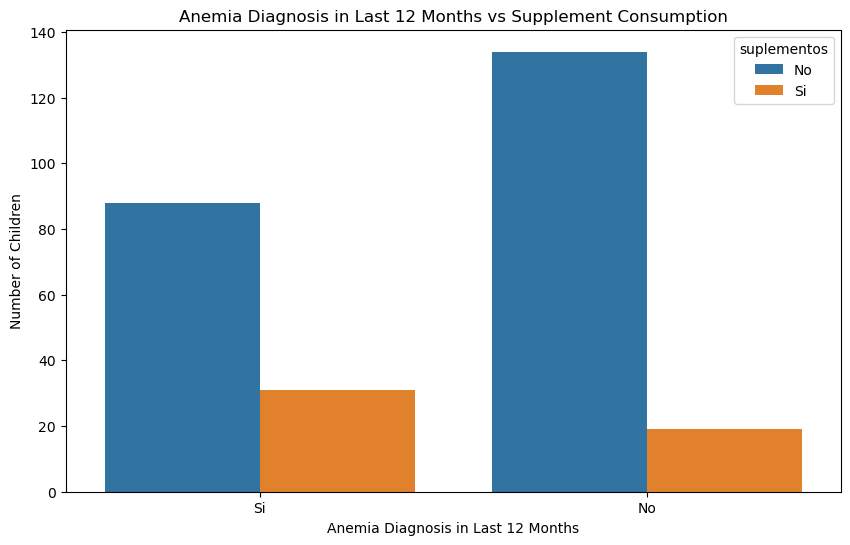

In [171]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_supplements_anemia, x='anemia', hue='suplementos'.lower())
plt.title('Anemia Diagnosis in Last 12 Months vs Supplement Consumption')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Number of Children')
plt.show()

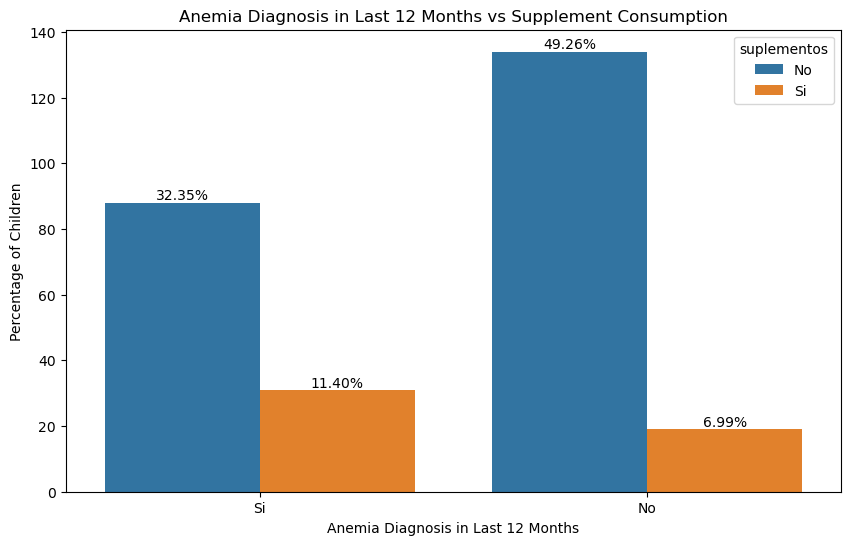

In [187]:
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_supplements_anemia, x='anemia', hue='suplementos'.lower())

# Calcular los porcentajes
total = len(merged_supplements_anemia)  # Total de observaciones
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.title('Anemia Diagnosis in Last 12 Months vs Supplement Consumption')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Percentage of Children')

plt.show()


# DATA MART 5: Controles y BMI, sexo, pecho

## Data integration

In [172]:
query_control = 'select * from schema_nutri.cred_peso_talla'

In [173]:
data_control = pd.read_sql_query(query_control, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\1259233299.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_control = pd.read_sql_query(query_control, conn)


In [174]:
data_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   conglome       495 non-null    int64  
 1   vivienda       495 non-null    int64  
 2   id             495 non-null    object 
 3   p325_peso_nac  340 non-null    float64
 4   p327_peso_00   197 non-null    float64
 5   p327_talla_00  196 non-null    float64
 6   p327_peso_01   305 non-null    float64
 7   p327_talla_01  305 non-null    float64
 8   p327_peso_02   359 non-null    float64
 9   p327_talla_02  359 non-null    float64
 10  p327_peso_03   334 non-null    float64
 11  p327_talla_03  334 non-null    float64
 12  p327_peso_04   337 non-null    float64
 13  p327_talla_04  337 non-null    float64
 14  p327_peso_05   302 non-null    float64
 15  p327_talla_05  302 non-null    float64
 16  p327_peso_06   319 non-null    float64
 17  p327_talla_06  319 non-null    float64
 18  p327_peso_

<Axes: ylabel='p327_peso_00'>

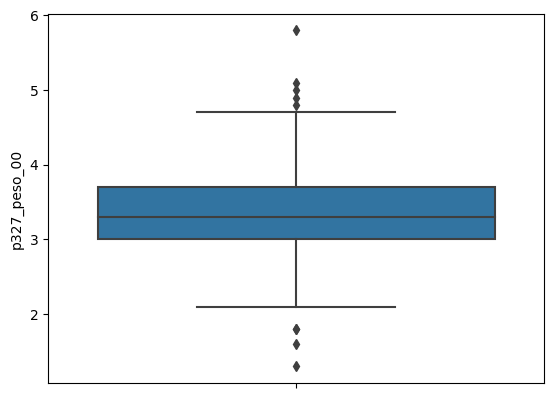

In [175]:
sns.boxplot(y=data_control['p327_peso_00' ])

In [176]:
data_control.p327_peso_00.describe()

count    197.000000
mean       3.378173
std        0.602614
min        1.300000
25%        3.000000
50%        3.300000
75%        3.700000
max        5.800000
Name: p327_peso_00, dtype: float64

In [177]:
query_alimentacion = 'select * from schema_nutri.alimentacion_300'

In [178]:
data_alimentacion = pd.read_sql_query(query_alimentacion, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\1517880279.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_alimentacion = pd.read_sql_query(query_alimentacion, conn)


In [179]:
data_alimentacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conglome             495 non-null    int64  
 1   vivienda             495 non-null    int64  
 2   id                   495 non-null    object 
 3   p367                 495 non-null    int64  
 4   p368_tiempo          489 non-null    float64
 5   p368_horas           214 non-null    float64
 6   p368_dias            48 non-null     float64
 7   p369                 491 non-null    float64
 8   p370_meses           237 non-null    float64
 9   p370_ns              0 non-null      object 
 10  p371                 495 non-null    int64  
 11  p371_agua            495 non-null    int64  
 12  p371_formula         495 non-null    int64  
 13  p371_leche_envasada  495 non-null    int64  
 14  p371_leche_vaca      495 non-null    int64  
 15  p371_jugo            495 non-null    int

In [180]:
merged_data_scatter = pd.merge(data_alimentacion, data_control, on=['conglome', 'vivienda', 'id'], suffixes=('_alim', '_cred'))

In [181]:
merged_data_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conglome             495 non-null    int64  
 1   vivienda             495 non-null    int64  
 2   id                   495 non-null    object 
 3   p367                 495 non-null    int64  
 4   p368_tiempo          489 non-null    float64
 5   p368_horas           214 non-null    float64
 6   p368_dias            48 non-null     float64
 7   p369                 491 non-null    float64
 8   p370_meses           237 non-null    float64
 9   p370_ns              0 non-null      object 
 10  p371                 495 non-null    int64  
 11  p371_agua            495 non-null    int64  
 12  p371_formula         495 non-null    int64  
 13  p371_leche_envasada  495 non-null    int64  
 14  p371_leche_vaca      495 non-null    int64  
 15  p371_jugo            495 non-null    int

In [184]:
merged_data_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conglome             495 non-null    int64  
 1   vivienda             495 non-null    int64  
 2   id                   495 non-null    object 
 3   p367                 495 non-null    int64  
 4   p368_tiempo          489 non-null    float64
 5   p368_horas           214 non-null    float64
 6   p368_dias            48 non-null     float64
 7   p369                 491 non-null    float64
 8   p370_meses           237 non-null    float64
 9   p370_ns              0 non-null      object 
 10  p371                 495 non-null    int64  
 11  p371_agua            495 non-null    int64  
 12  p371_formula         495 non-null    int64  
 13  p371_leche_envasada  495 non-null    int64  
 14  p371_leche_vaca      495 non-null    int64  
 15  p371_jugo            495 non-null    int

In [ ]:
merged_data

In [186]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           461 non-null    int64 
 1   conglome        461 non-null    int64 
 2   vivienda        461 non-null    int64 
 3   id              461 non-null    int32 
 4   altitud         461 non-null    int64 
 5   sexo            461 non-null    object
 6   departamento_x  461 non-null    object
 7   provincia_x     461 non-null    object
 8   distrito_x      461 non-null    object
 9   res_peso        461 non-null    int64 
 10  res_talla       461 non-null    int64 
 11  res_hb          461 non-null    int64 
 12  res_final       461 non-null    int64 
 13  pais            461 non-null    object
 14  index_          461 non-null    object
 15  Area_Type       461 non-null    object
dtypes: int32(1), int64(8), object(7)
memory usage: 55.9+ KB


In [188]:
merged_data_scatter['id'] = merged_data_scatter['id'].astype(float)

In [189]:
merged_data_scatter['id'] = merged_data_scatter['id'].astype(int)

In [190]:
merged_data_scatter = pd.merge(merged_data_scatter, merged_data, on=['conglome', 'vivienda', 'id'])

## Data cleaning level 1

In [191]:
merged_data_scatter['index_'] = merged_data_scatter['conglome'].astype(str) + '_' + merged_data_scatter['vivienda'].astype(str) + '_' + merged_data_scatter['id'].astype(float).astype(int).astype(str)
# identificador unico

In [192]:
merged_data_scatter.columns

Index(['conglome', 'vivienda', 'id', 'p367', 'p368_tiempo', 'p368_horas',
       'p368_dias', 'p369', 'p370_meses', 'p370_ns', 'p371', 'p371_agua',
       'p371_formula', 'p371_leche_envasada', 'p371_leche_vaca', 'p371_jugo',
       'p371_otro', 'p371_caldos', 'p371_ninguno', 'p325_peso_nac',
       'p327_peso_00', 'p327_talla_00', 'p327_peso_01', 'p327_talla_01',
       'p327_peso_02', 'p327_talla_02', 'p327_peso_03', 'p327_talla_03',
       'p327_peso_04', 'p327_talla_04', 'p327_peso_05', 'p327_talla_05',
       'p327_peso_06', 'p327_talla_06', 'p327_peso_07', 'p327_talla_07',
       'p327_peso_08', 'p327_talla_08', 'p327_peso_09', 'p327_talla_09',
       'p327_peso_10', 'p327_talla_10', 'p331', 'p332', 'p333', 'p334',
       'index', 'altitud', 'sexo', 'departamento_x', 'provincia_x',
       'distrito_x', 'res_peso', 'res_talla', 'res_hb', 'res_final', 'pais',
       'index_', 'Area_Type'],
      dtype='object')

In [193]:
merged_data_scatter.rename(columns={
    'p367': 'Amamantado',
    
}, inplace=True)

In [194]:
merged_data_scatter.columns

Index(['conglome', 'vivienda', 'id', 'Amamantado', 'p368_tiempo', 'p368_horas',
       'p368_dias', 'p369', 'p370_meses', 'p370_ns', 'p371', 'p371_agua',
       'p371_formula', 'p371_leche_envasada', 'p371_leche_vaca', 'p371_jugo',
       'p371_otro', 'p371_caldos', 'p371_ninguno', 'p325_peso_nac',
       'p327_peso_00', 'p327_talla_00', 'p327_peso_01', 'p327_talla_01',
       'p327_peso_02', 'p327_talla_02', 'p327_peso_03', 'p327_talla_03',
       'p327_peso_04', 'p327_talla_04', 'p327_peso_05', 'p327_talla_05',
       'p327_peso_06', 'p327_talla_06', 'p327_peso_07', 'p327_talla_07',
       'p327_peso_08', 'p327_talla_08', 'p327_peso_09', 'p327_talla_09',
       'p327_peso_10', 'p327_talla_10', 'p331', 'p332', 'p333', 'p334',
       'index', 'altitud', 'sexo', 'departamento_x', 'provincia_x',
       'distrito_x', 'res_peso', 'res_talla', 'res_hb', 'res_final', 'pais',
       'index_', 'Area_Type'],
      dtype='object')

## Data cleaning level 2

In [195]:
needed_columns = ['index_', 'Amamantado', 'sexo'] + [f'p327_peso_0{i}' for i in range(8)] +  [f'p327_talla_0{i}' for i in range(8)]

In [196]:
cleaned_data = merged_data_scatter[needed_columns]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index_         461 non-null    object 
 1   Amamantado     461 non-null    int64  
 2   sexo           461 non-null    object 
 3   p327_peso_00   184 non-null    float64
 4   p327_peso_01   289 non-null    float64
 5   p327_peso_02   337 non-null    float64
 6   p327_peso_03   315 non-null    float64
 7   p327_peso_04   317 non-null    float64
 8   p327_peso_05   285 non-null    float64
 9   p327_peso_06   301 non-null    float64
 10  p327_peso_07   280 non-null    float64
 11  p327_talla_00  183 non-null    float64
 12  p327_talla_01  289 non-null    float64
 13  p327_talla_02  337 non-null    float64
 14  p327_talla_03  315 non-null    float64
 15  p327_talla_04  317 non-null    float64
 16  p327_talla_05  285 non-null    float64
 17  p327_talla_06  301 non-null    float64
 18  p327_talla

In [197]:
cleaned_data.index_.value_counts()

5345_4_3       1
6597_166_5     1
6581_82_99     1
6572_118_5     1
6572_114_8     1
              ..
7574_69_6      1
7567_87_6      1
7567_59_6      1
7554_90_8      1
5155_213_99    1
Name: index_, Length: 461, dtype: int64

In [198]:
cleaned_data.Amamantado.value_counts()

1    457
2      4
Name: Amamantado, dtype: int64

In [199]:
cleaned_data.Amamantado = cleaned_data.Amamantado.replace({1: 'Si', 2: 'No'})

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\3322057350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.Amamantado = cleaned_data.Amamantado.replace({1: 'Si', 2: 'No'})


## Data cleaning level 3


In [200]:
isMV = cleaned_data.p327_peso_00.isna()
isMV


0      False
1      False
2       True
3      False
4       True
       ...  
456    False
457     True
458    False
459    False
460     True
Name: p327_peso_00, Length: 461, dtype: bool

In [201]:
from scipy.stats import ttest_ind
def diagnosticoMV_numerical(df, atributo, isMV):

  labelsDic = {True:'CON Valores Faltantes',False:'SIN Valores Faltantes'}

  #Método Visual
  labels=[]
  box_sr = pd.Series('',index = isMV.unique())
  for poss in isMV.unique():
    # Filtra a los indices que son iguales a poss
    BM = isMV == poss
    # Agrega a box_sr
    box_sr[poss] = df[BM][atributo].dropna()
    labels.append(labelsDic[poss])

  
  plt.boxplot(box_sr,vert=False)
  plt.yticks([1,2],labels)
  plt.xlabel(atributo)
  plt.show()

  #Método Estadístico
  grupoCMV = df[isMV][atributo].dropna()
  grupoSMV = df[~isMV][atributo].dropna()
  pvalue = ttest_ind(grupoCMV,grupoSMV).pvalue

  print('p-value es: {}'.format(pvalue))


  

Diagnóstico para datos faltantes en p327_peso_01:


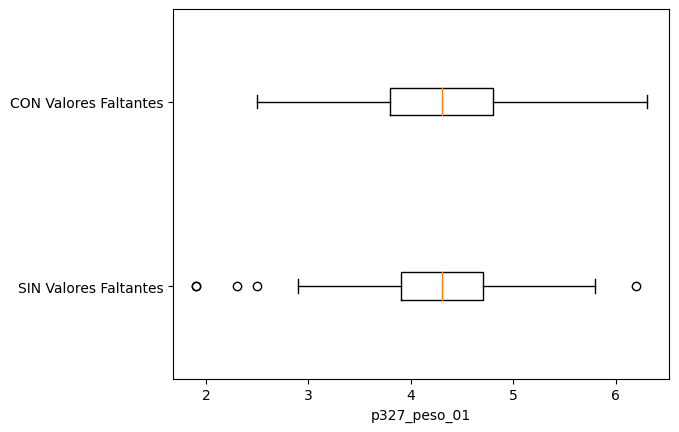

p-value es: 0.7615049013387347
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_02:


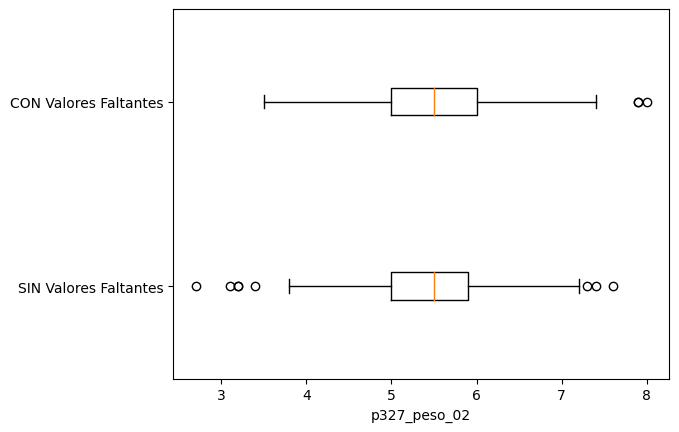

p-value es: 0.33620207887979026
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_03:


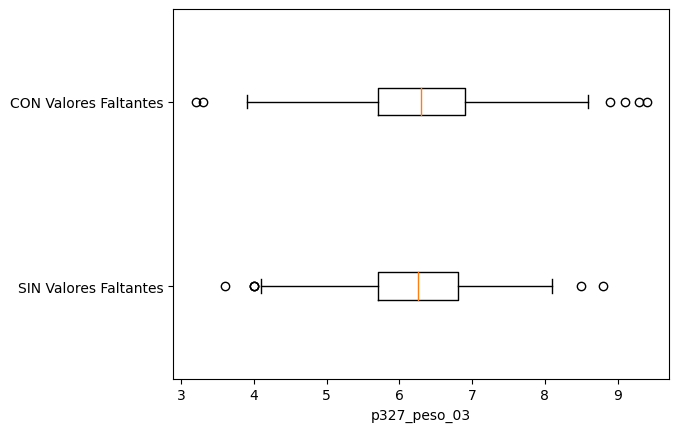

p-value es: 0.3882170311221297
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_04:


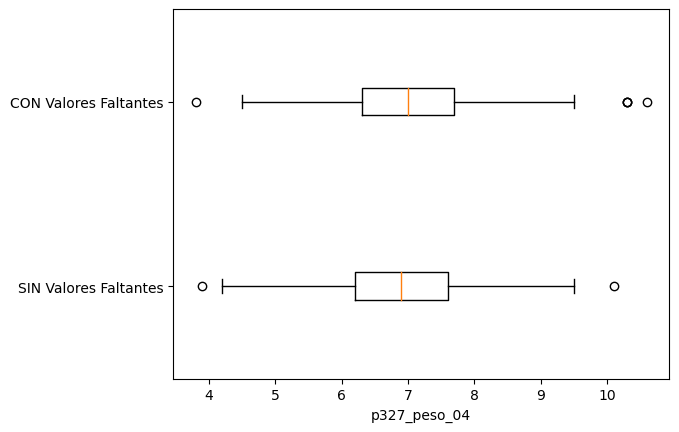

p-value es: 0.12720976346817428
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_05:


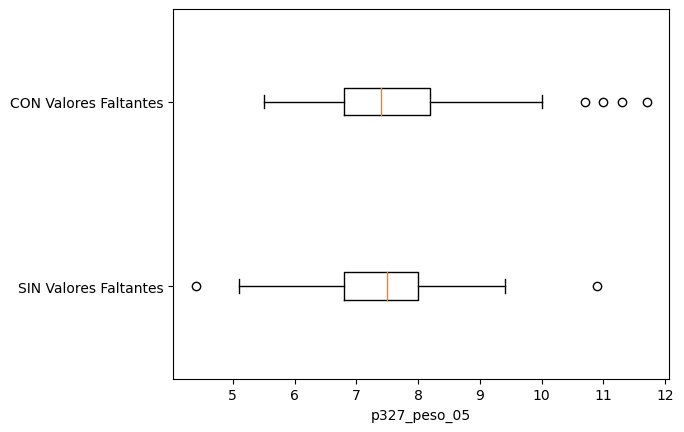

p-value es: 0.2481372134790143
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_06:


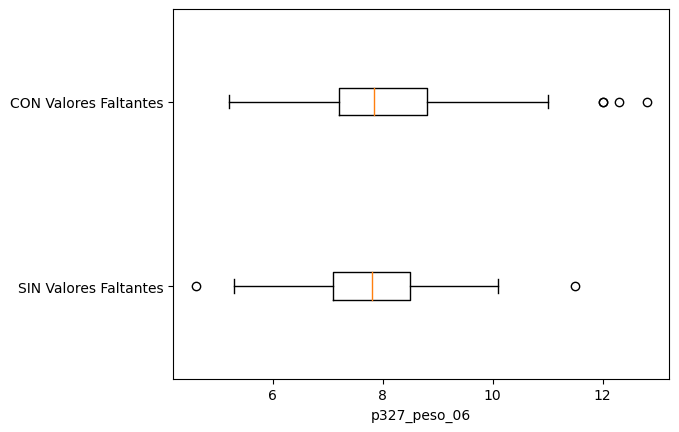

p-value es: 0.024636425836797923
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_07:


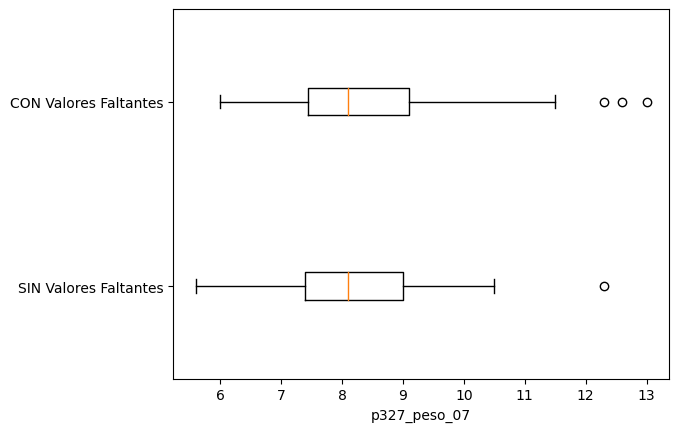

p-value es: 0.04523273129164009
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_00:


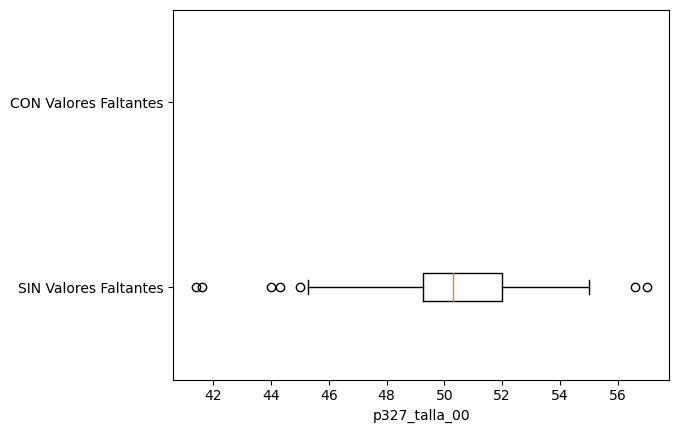

p-value es: nan
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_01:


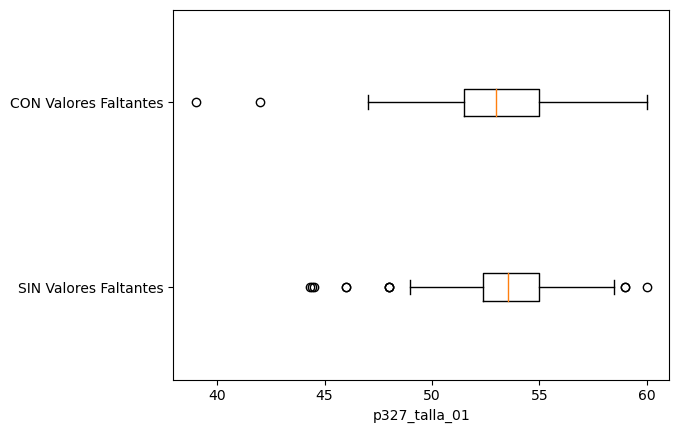

p-value es: 0.3367800727929098
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_02:


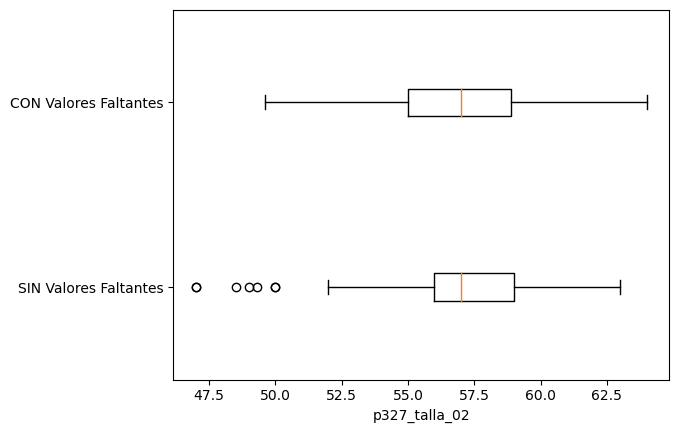

p-value es: 0.6811061248481238
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_03:


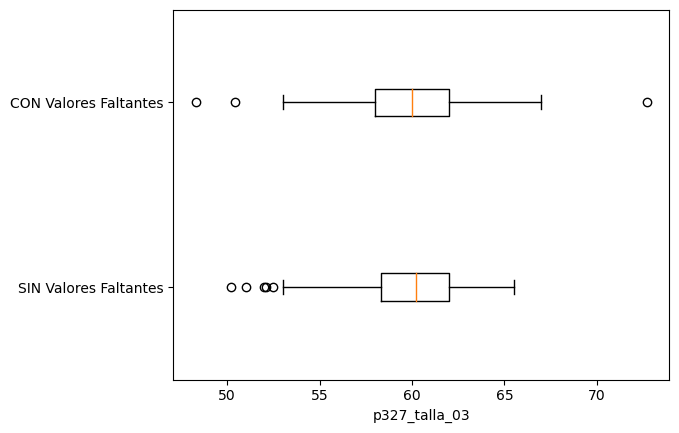

p-value es: 0.9116879771156364
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_04:


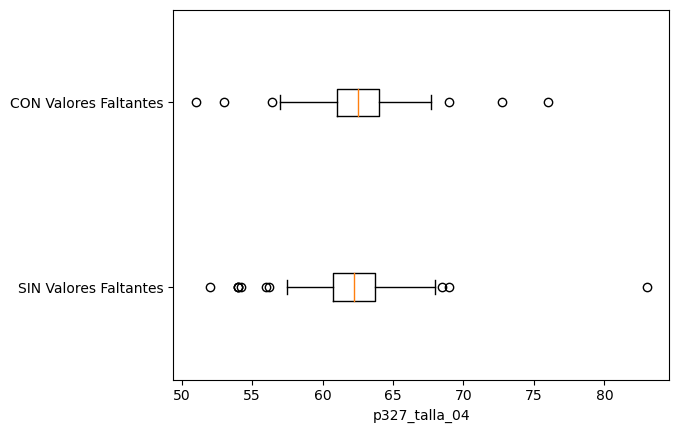

p-value es: 0.4463594018085202
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_05:


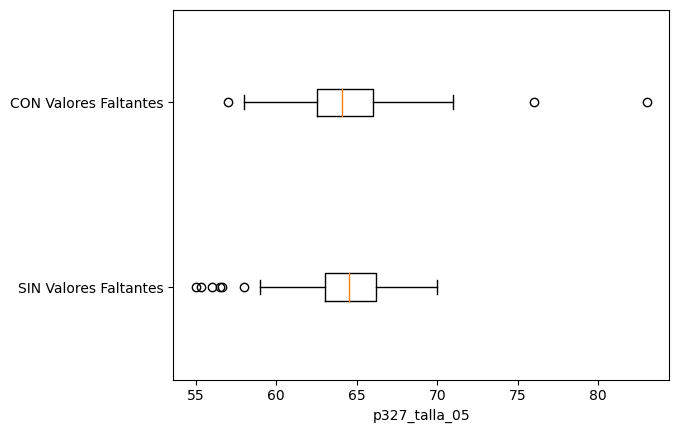

p-value es: 0.8962040508768883
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_06:


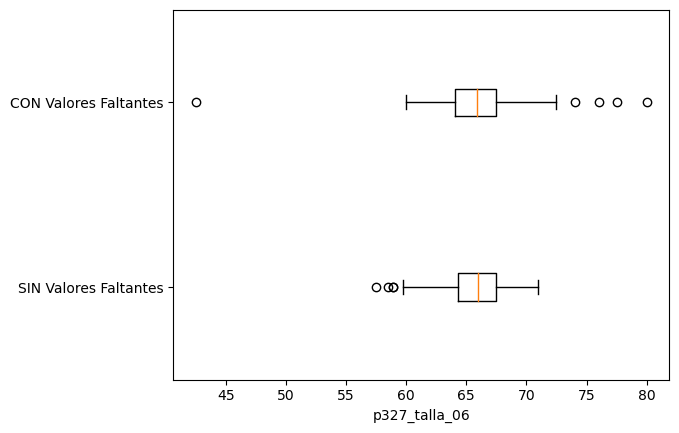

p-value es: 0.6915662464477226
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_07:


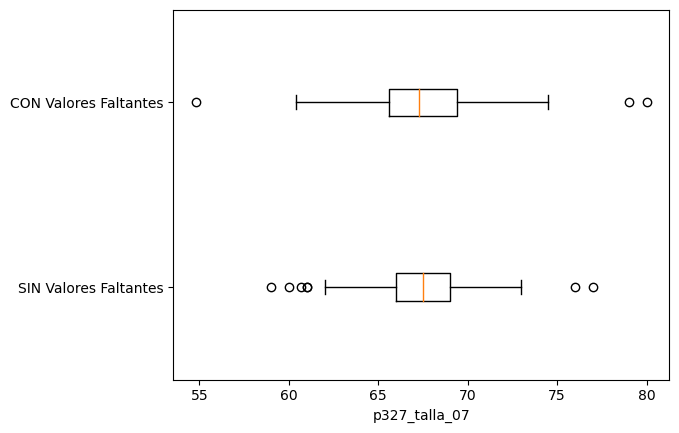

p-value es: 0.6659497955016142
- - - - - - - - - - - - - - - - - - - - - - - 


In [202]:
numAttr = [f'p327_peso_0{i}' for i in range(1,8)] +  [f'p327_talla_0{i}' for i in range(8)]

isMV = cleaned_data.p327_peso_00.isna()
for atributo in numAttr:
    print('Diagnóstico para datos faltantes en {}:'.format(atributo))
    diagnosticoMV_numerical(cleaned_data,atributo,isMV)
    print('- - - - - - - - - - - - - - - - - - - - - - - ')

**Variables categóricas**


In [203]:
from scipy.stats import chi2_contingency 
def diagnosticoMV_categorico(df, atributo, isMV):
  labelsDic = {True:'CON Valores Faltantes',False:'SIN Valores Faltantes'}
  plt.figure(figsize=(10,4))
  for i,poss in enumerate(isMV.unique()):
    plt.subplot(1,2,i+1)
    BM = isMV == poss
    df[BM][atributo].value_counts().plot.bar()
    plt.title(labelsDic[i])
  plt.show()

  contigency_table = pd.crosstab(isMV,df[atributo])
  p_value = chi2_contingency(contigency_table)[1]
    
  print('p-value of Chi_squared test: {}'.format(p_value)) 

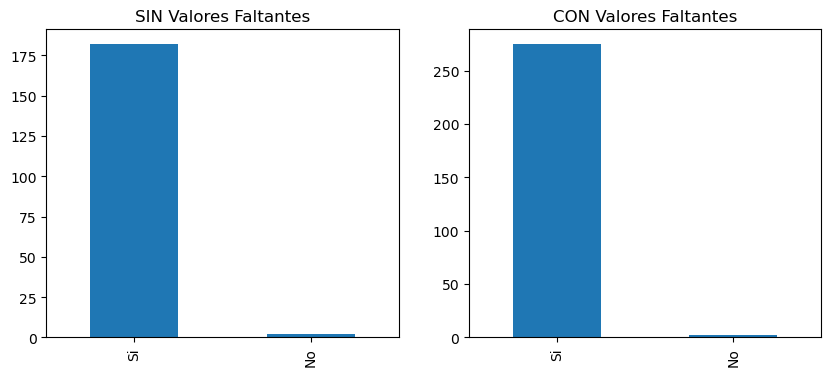

p-value of Chi_squared test: 1.0


In [204]:
diagnosticoMV_categorico(cleaned_data, "Amamantado", isMV)

- Todos los controles tienen el mismo numero de tallas y pesos.

## Diagnostico: MCAR

In [205]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index_         461 non-null    object 
 1   Amamantado     461 non-null    object 
 2   sexo           461 non-null    object 
 3   p327_peso_00   184 non-null    float64
 4   p327_peso_01   289 non-null    float64
 5   p327_peso_02   337 non-null    float64
 6   p327_peso_03   315 non-null    float64
 7   p327_peso_04   317 non-null    float64
 8   p327_peso_05   285 non-null    float64
 9   p327_peso_06   301 non-null    float64
 10  p327_peso_07   280 non-null    float64
 11  p327_talla_00  183 non-null    float64
 12  p327_talla_01  289 non-null    float64
 13  p327_talla_02  337 non-null    float64
 14  p327_talla_03  315 non-null    float64
 15  p327_talla_04  317 non-null    float64
 16  p327_talla_05  285 non-null    float64
 17  p327_talla_06  301 non-null    float64
 18  p327_talla

In [206]:
cleaned_data = cleaned_data.interpolate()


### Se interpola pues los valores faltantes son MCAR y los outliers son dentro de los valores normales, ademas de ser medidas temporales.

## Data transformation

In [207]:
def calculate_bmi(weight, height):

    height_m = height / 100

    # Calculate BMI
    bmi = weight/ (height_m ** 2)
    return bmi

In [208]:
for i in range(8):
    weight_col = f'P327_PESO_0{i}'.lower()
    height_col = f'P327_TALLA_0{i}'.lower()
    bmi_col = f'BMI_0{i}'

    cleaned_data[bmi_col] = calculate_bmi(cleaned_data[weight_col], cleaned_data[height_col])


In [209]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index_         461 non-null    object 
 1   Amamantado     461 non-null    object 
 2   sexo           461 non-null    object 
 3   p327_peso_00   461 non-null    float64
 4   p327_peso_01   461 non-null    float64
 5   p327_peso_02   461 non-null    float64
 6   p327_peso_03   461 non-null    float64
 7   p327_peso_04   461 non-null    float64
 8   p327_peso_05   461 non-null    float64
 9   p327_peso_06   461 non-null    float64
 10  p327_peso_07   461 non-null    float64
 11  p327_talla_00  461 non-null    float64
 12  p327_talla_01  461 non-null    float64
 13  p327_talla_02  461 non-null    float64
 14  p327_talla_03  461 non-null    float64
 15  p327_talla_04  461 non-null    float64
 16  p327_talla_05  461 non-null    float64
 17  p327_talla_06  461 non-null    float64
 18  p327_talla

In [210]:
cleaned_data.to_csv('csv_tableau/data_scatter.csv', index=False)

In [211]:



# Create a pivot table in pandas
# This will take all the BMI columns and 'pivot' them into two new columns: 'Control' and 'BMI'
df_melted = cleaned_data.melt(id_vars=['index_', 'Amamantado', 'sexo'], 
                    value_vars=[f'BMI_{i:02d}' for i in range(8)], 
                    var_name='Control', 
                    value_name='BMI')

# Remove 'BMI_' from 'Control' values
df_melted['Control'] = df_melted['Control'].str.replace('BMI_', '')

# Convert 'Control' to numeric
df_melted['Control'] = pd.to_numeric(df_melted['Control'])



In [212]:
# Save the modified dataframe to a new CSV file
df_melted['sexo'] = df_melted['sexo'].replace({1: 'Masculino', 2: 'Femenino'})
df_melted.to_csv('csv_tableau/modified_data_scatter.csv', index=False)


# DATA MART 6: HEMOGLOBINA.

## Data integration

In [213]:
query_hem = 'select * from schema_nutri.res_sin_id_400'

In [214]:
data_hem = pd.read_sql_query(query_hem, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_25164\1024913620.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_hem = pd.read_sql_query(query_hem, conn)


In [216]:
data_hem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   conglome        90 non-null     int64  
 1   vivienda        90 non-null     int64  
 2   id              90 non-null     object 
 3   p400            90 non-null     int64  
 4   p402            90 non-null     int64  
 5   p408_edad       90 non-null     int64  
 6   p408_aÑos       83 non-null     float64
 7   p408_meses      90 non-null     int64  
 8   p409            78 non-null     float64
 9   p410            89 non-null     float64
 10  p411            78 non-null     float64
 11  p412            89 non-null     float64
 12  p413            89 non-null     float64
 13  p415            80 non-null     float64
 14  p416_res_peso   90 non-null     int64  
 15  p416_res_talla  90 non-null     int64  
 16  p416_res_hb     90 non-null     int64  
dtypes: float64(7), int64(9), object(1)
me

In [217]:
data_hem['id'] = data_hem['id'].astype(float)

In [218]:
data_hem['id'] = data_hem['id'].astype(int)

In [219]:
data_merg_hem = pd.merge(data_hem, merged_data, on = ['conglome', 'vivienda', 'id'])

In [220]:
data_merg_hem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   conglome        73 non-null     int64  
 1   vivienda        73 non-null     int64  
 2   id              73 non-null     int32  
 3   p400            73 non-null     int64  
 4   p402            73 non-null     int64  
 5   p408_edad       73 non-null     int64  
 6   p408_aÑos       67 non-null     float64
 7   p408_meses      73 non-null     int64  
 8   p409            62 non-null     float64
 9   p410            73 non-null     float64
 10  p411            62 non-null     float64
 11  p412            73 non-null     float64
 12  p413            73 non-null     float64
 13  p415            73 non-null     float64
 14  p416_res_peso   73 non-null     int64  
 15  p416_res_talla  73 non-null     int64  
 16  p416_res_hb     73 non-null     int64  
 17  index           73 non-null     int64

## Data cleaning level 1

In [221]:
data_merg_hem['index_'] = data_merg_hem['conglome'].astype(str) + '_' + merged_data['vivienda'].astype(str) + '_' + merged_data['id'].astype(float).astype(int).astype(str)

In [222]:
data_merg_hem.rename(columns={
    'p408_edad': 'edad',
    'p415': 'Hemoglobina',
}, inplace=True)

In [223]:
data_merg_hem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   conglome        73 non-null     int64  
 1   vivienda        73 non-null     int64  
 2   id              73 non-null     int32  
 3   p400            73 non-null     int64  
 4   p402            73 non-null     int64  
 5   edad            73 non-null     int64  
 6   p408_aÑos       67 non-null     float64
 7   p408_meses      73 non-null     int64  
 8   p409            62 non-null     float64
 9   p410            73 non-null     float64
 10  p411            62 non-null     float64
 11  p412            73 non-null     float64
 12  p413            73 non-null     float64
 13  Hemoglobina     73 non-null     float64
 14  p416_res_peso   73 non-null     int64  
 15  p416_res_talla  73 non-null     int64  
 16  p416_res_hb     73 non-null     int64  
 17  index           73 non-null     int64

## Data cleaning level 2

In [224]:
columnas_sirven = ['index_', 'edad', 'Hemoglobina', 'sexo']
data_merg_hem = data_merg_hem[columnas_sirven]

In [225]:
data_merg_hem.sexo.replace({1: 'Masculino', 2: 'Femenino'}, inplace=True)

## Data cleaning level 3

<Axes: ylabel='Hemoglobina'>

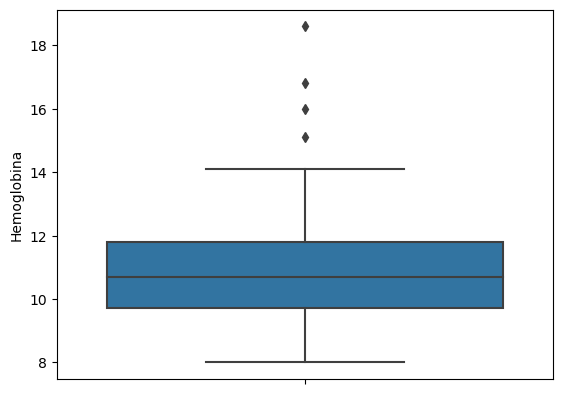

In [226]:
# no hay mvs asi que se ven outliers
sns.boxplot(y=data_merg_hem['Hemoglobina' ])

- Outliers dentro de lo comun, no se hace nada.

<Axes: ylabel='edad'>

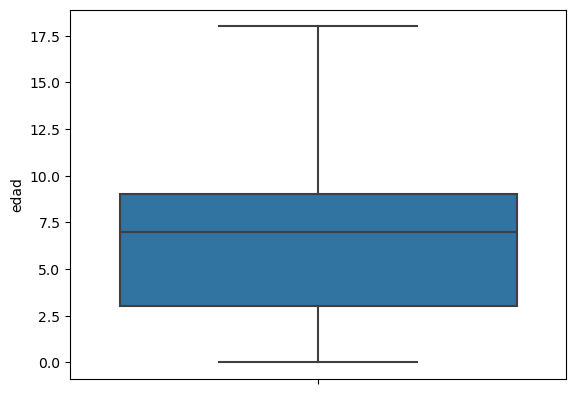

In [227]:
sns.boxplot(y=data_merg_hem['edad' ])

In [228]:
data_merg_hem.edad.describe()

count    73.000000
mean      6.589041
std       4.307086
min       0.000000
25%       3.000000
50%       7.000000
75%       9.000000
max      18.000000
Name: edad, dtype: float64

## Data transformation

# creamos tipo de edad en dos grupos 
data_merg_hem['etapa'] = data_merg_hem['edad'].apply(lambda x: '>= 1 año' if x >= 12 else '< 1 año')


In [229]:
data_merg_hem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index_       73 non-null     object 
 1   edad         73 non-null     int64  
 2   Hemoglobina  73 non-null     float64
 3   sexo         73 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ KB


In [230]:
data_merg_hem.to_csv('csv_tableau/data_hem.csv', index=False)

# End of transform.ipynb